In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/seeds_dataset.txt", sep="\t")

In [3]:
df.head()

,area,perimeter,compactness,length,with,asymmetry,groove,result
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
from scipy.cluster.vq import kmeans2, whiten

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,area,perimeter,compactness,length,with,asymmetry,groove,result
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
with,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
result,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [6]:
result = df["result"]
df.drop(columns="result", inplace=True)
df.head()

,area,perimeter,compactness,length,with,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [9]:
x = np.array(df)
clusters = 3

In [12]:
kmeans = KMeans(n_clusters=clusters, random_state=0, max_iter=300).fit(x)
cluster=kmeans.labels_

In [ ]:
xd = np.array(result)
rt =xd.reshape(1, -1)
kmeans.score(df[:-2])

In [ ]:
def plot_cluster(cluster):
    sns.set(rc={'figure.figsize':(15,10)})
    sns.scatterplot(data=x, x=x[:,0], y=x[:,1], hue=cluster, palette="deep")
    plt.title("Stations clustered by kmeans", fontsize=20)
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel('Longitude', fontsize=12)

In [ ]:
plot_cluster(clust2)

In [13]:
df["y"]=cluster
df.head()

,area,perimeter,compactness,length,with,asymmetry,groove,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
clust2.score(result)

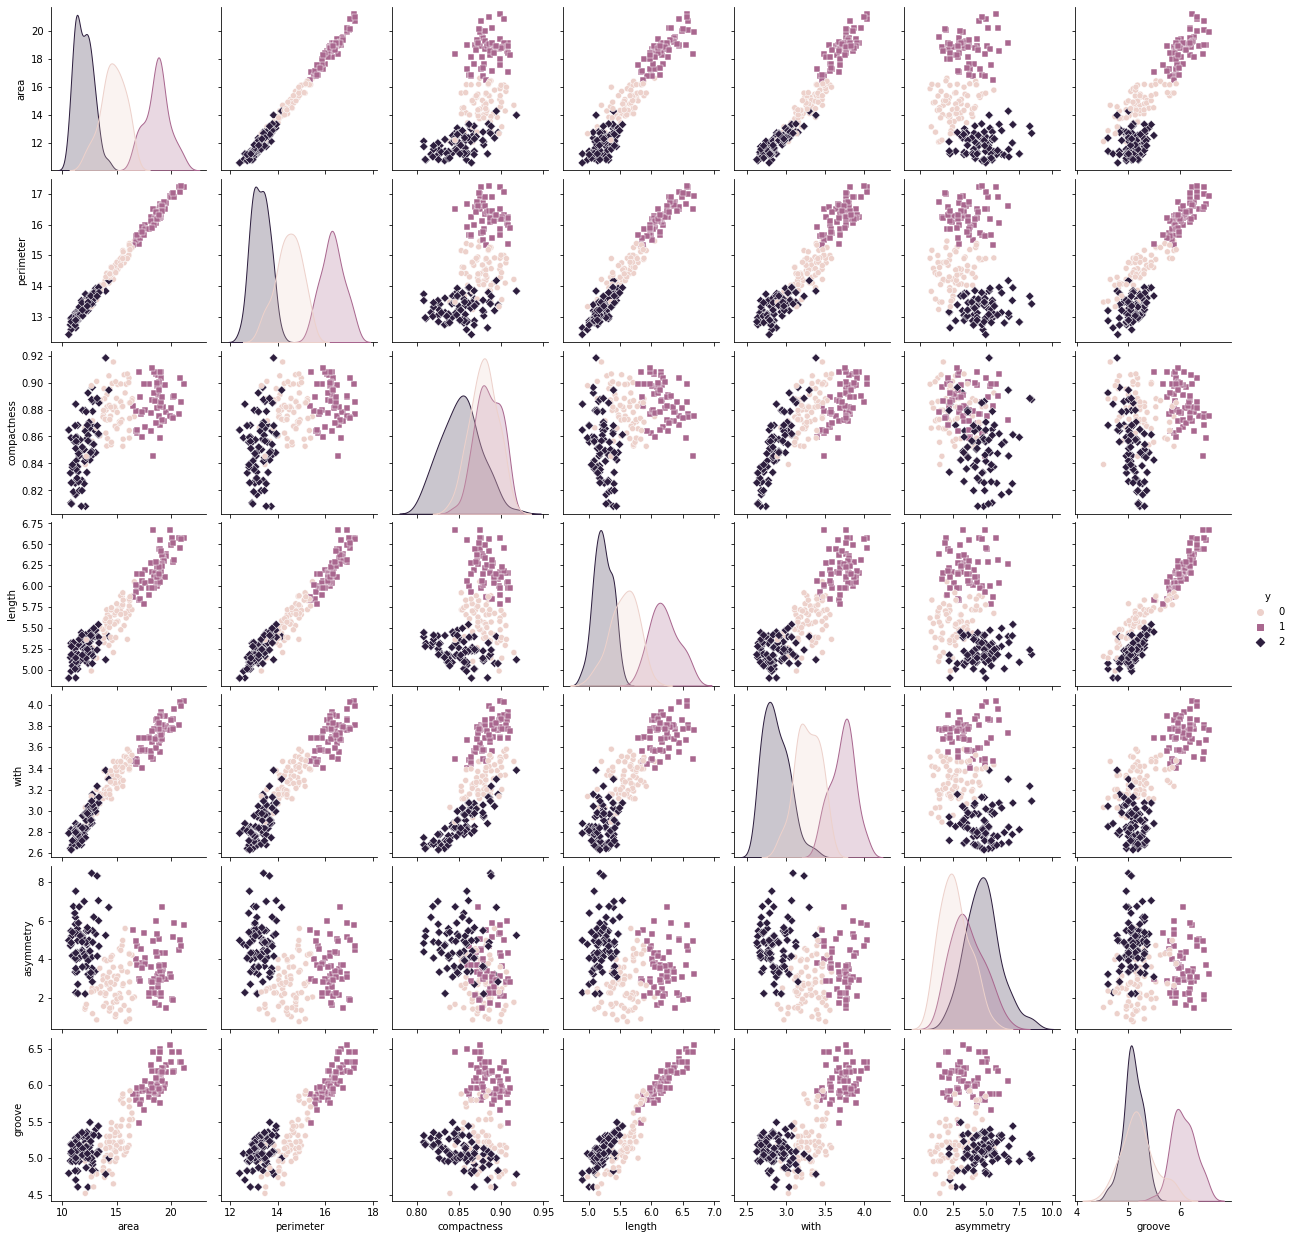

In [14]:
#sns.pairplot(df, hue=clust2)
sns.pairplot(df, vars=df.columns[:-1], hue = "y", markers=["o", "s", "D"])

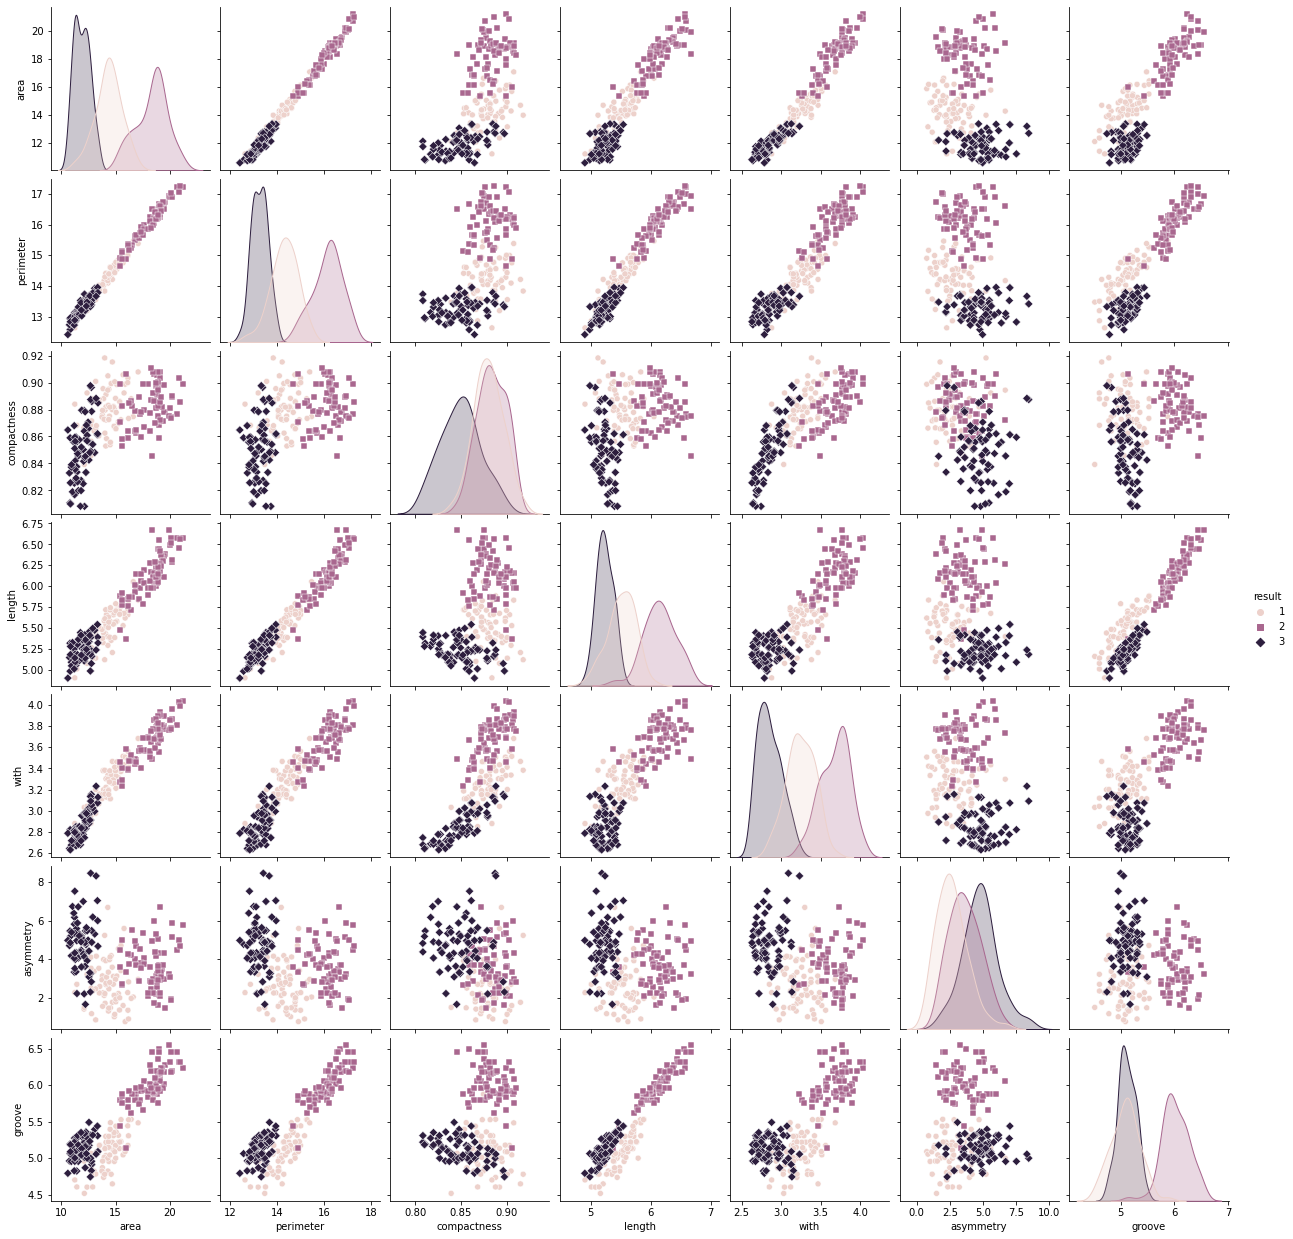

In [15]:
df["result"]=result
sns.pairplot(df, vars=df.columns[:-2], hue = "result", markers=["o", "s", "D"])

In [ ]:
df